# Function Approximation with a Simple Neural Network

This code is provided as supplementary material of the lecture Machine Learning and Optimization in Communications (MLOC).<br>

This code illustrates:
* Approximation of 1D functions using a simple neural network (NN)

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("We are using the following device for learning:",device)

We are using the following device for learning: cpu


Create a **neural network** as required by the exercise

In [45]:
class simple_NN(nn.Module):
    def __init__(self):
        super(simple_NN, self).__init__()
       
        # initialize weights
        weight_init = np.array([2.0, -10.0, 1.0, -3.0, -4.0, -1.0, 1.0])               
        self.weights = torch.nn.Parameter(torch.from_numpy(weight_init))
        
        # random weights
        #self.weights = torch.nn.Parameter(torch.randn(7))
        
        # Non-linearity via softmax
        self.sigmoid = nn.Sigmoid()
        self.ReLU = nn.ReLU()
        
    def forward(self, x):
        a1 = self.sigmoid(self.weights[0]*x)
        a2 = self.sigmoid(self.weights[1]*x)
        a3 = self.ReLU(self.weights[2]*a1 + self.weights[3]*a2)
        out = self.sigmoid(self.weights[4]*a1 + self.weights[5]*a2 + self.weights[6]*a3)
        
        return out

Compute output for the given input values and the given weights

In [47]:
model = simple_NN()
model.to(device)

x = torch.Tensor([0,1])
out = model(x)
print(out)

tensor([0.0759, 0.0664], grad_fn=<SigmoidBackward>)


In [52]:
# initialize model
model = simple_NN()
model.to(device)

# TODO select loss function
loss_fn = nn.MSELoss()

# TODO select Adam optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)  
#optimizer = optim.Adam(model.parameters())

# Build dataset
x_train = torch.Tensor([-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0])
y_train = torch.Tensor([0.7312, 0.7339, 0.7438, 0.7832, 0.8903, 0.9820, 0.8114, 0.5937, 0.5219, 0.5049, 0.5002])


# main gradient descent loop
for i in range(100000):       
    x_hat = model(x_train)
    loss = loss_fn(x_hat, y_train)
    
    # compute gradient
    loss.backward()
    
    # optimize
    optimizer.step()
    
    # reset gradients
    optimizer.zero_grad()
    
    if i % 1000 == 0:
        print('Iteration',i,' : Loss = ', loss)

Iteration 0  : Loss =  tensor(0.3551, grad_fn=<MseLossBackward>)
Iteration 1000  : Loss =  tensor(0.2001, grad_fn=<MseLossBackward>)
Iteration 2000  : Loss =  tensor(0.0828, grad_fn=<MseLossBackward>)
Iteration 3000  : Loss =  tensor(0.0621, grad_fn=<MseLossBackward>)
Iteration 4000  : Loss =  tensor(0.0529, grad_fn=<MseLossBackward>)
Iteration 5000  : Loss =  tensor(0.0477, grad_fn=<MseLossBackward>)
Iteration 6000  : Loss =  tensor(0.0442, grad_fn=<MseLossBackward>)
Iteration 7000  : Loss =  tensor(0.0415, grad_fn=<MseLossBackward>)
Iteration 8000  : Loss =  tensor(0.0394, grad_fn=<MseLossBackward>)
Iteration 9000  : Loss =  tensor(0.0377, grad_fn=<MseLossBackward>)
Iteration 10000  : Loss =  tensor(0.0362, grad_fn=<MseLossBackward>)
Iteration 11000  : Loss =  tensor(0.0349, grad_fn=<MseLossBackward>)
Iteration 12000  : Loss =  tensor(0.0337, grad_fn=<MseLossBackward>)
Iteration 13000  : Loss =  tensor(0.0327, grad_fn=<MseLossBackward>)
Iteration 14000  : Loss =  tensor(0.0318, grad_

In [53]:
print(model.weights)

Parameter containing:
tensor([  2.6254, -10.0122,   0.7824,  -2.9615,   0.8522,   1.3668,  -0.6186],
       dtype=torch.float64, requires_grad=True)


In [54]:
print(x_hat)

tensor([0.7969, 0.7976, 0.7995, 0.8060, 0.8232, 0.7520, 0.5772, 0.5850, 0.5893,
        0.5906, 0.5910], grad_fn=<SigmoidBackward>)


Text(0, 0.5, 'y')

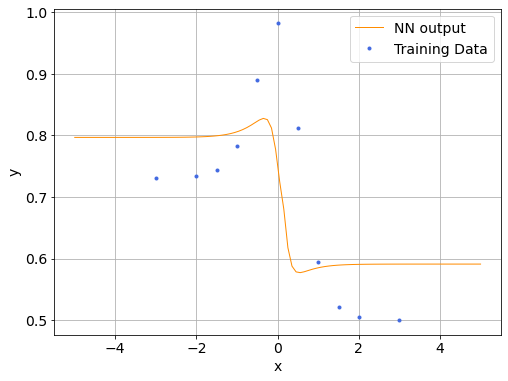

In [55]:
fig = plt.figure(1, figsize=(8,6))

x_eval = np.linspace(-5,5,100)
x_hat = model(torch.from_numpy(x_eval))

plt.plot(x_eval, x_hat.detach().cpu().numpy(), '-', color='darkorange', linewidth=1.0)   
plt.plot(x_train, y_train, '.', color='royalblue')
plt.legend(['NN output', 'Training Data'])
plt.grid(which='both');
plt.rcParams.update({'font.size': 14})
plt.xlabel('x');
plt.ylabel('y')